In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ass = np.loadtxt('list_associated_final.txt', dtype='str')
inte = np.loadtxt('list_intervening_final.txt', dtype='str')

In [3]:
# name = 1
# for i in inte:
#     tmp = np.loadtxt(i)
#     plt.plot(tmp[:,0], tmp[:,1])
#     plt.axis('off')
#     plt.savefig(str(name)+'.png')
#     plt.show()
#     name += 1

In [4]:
len(ass)

33

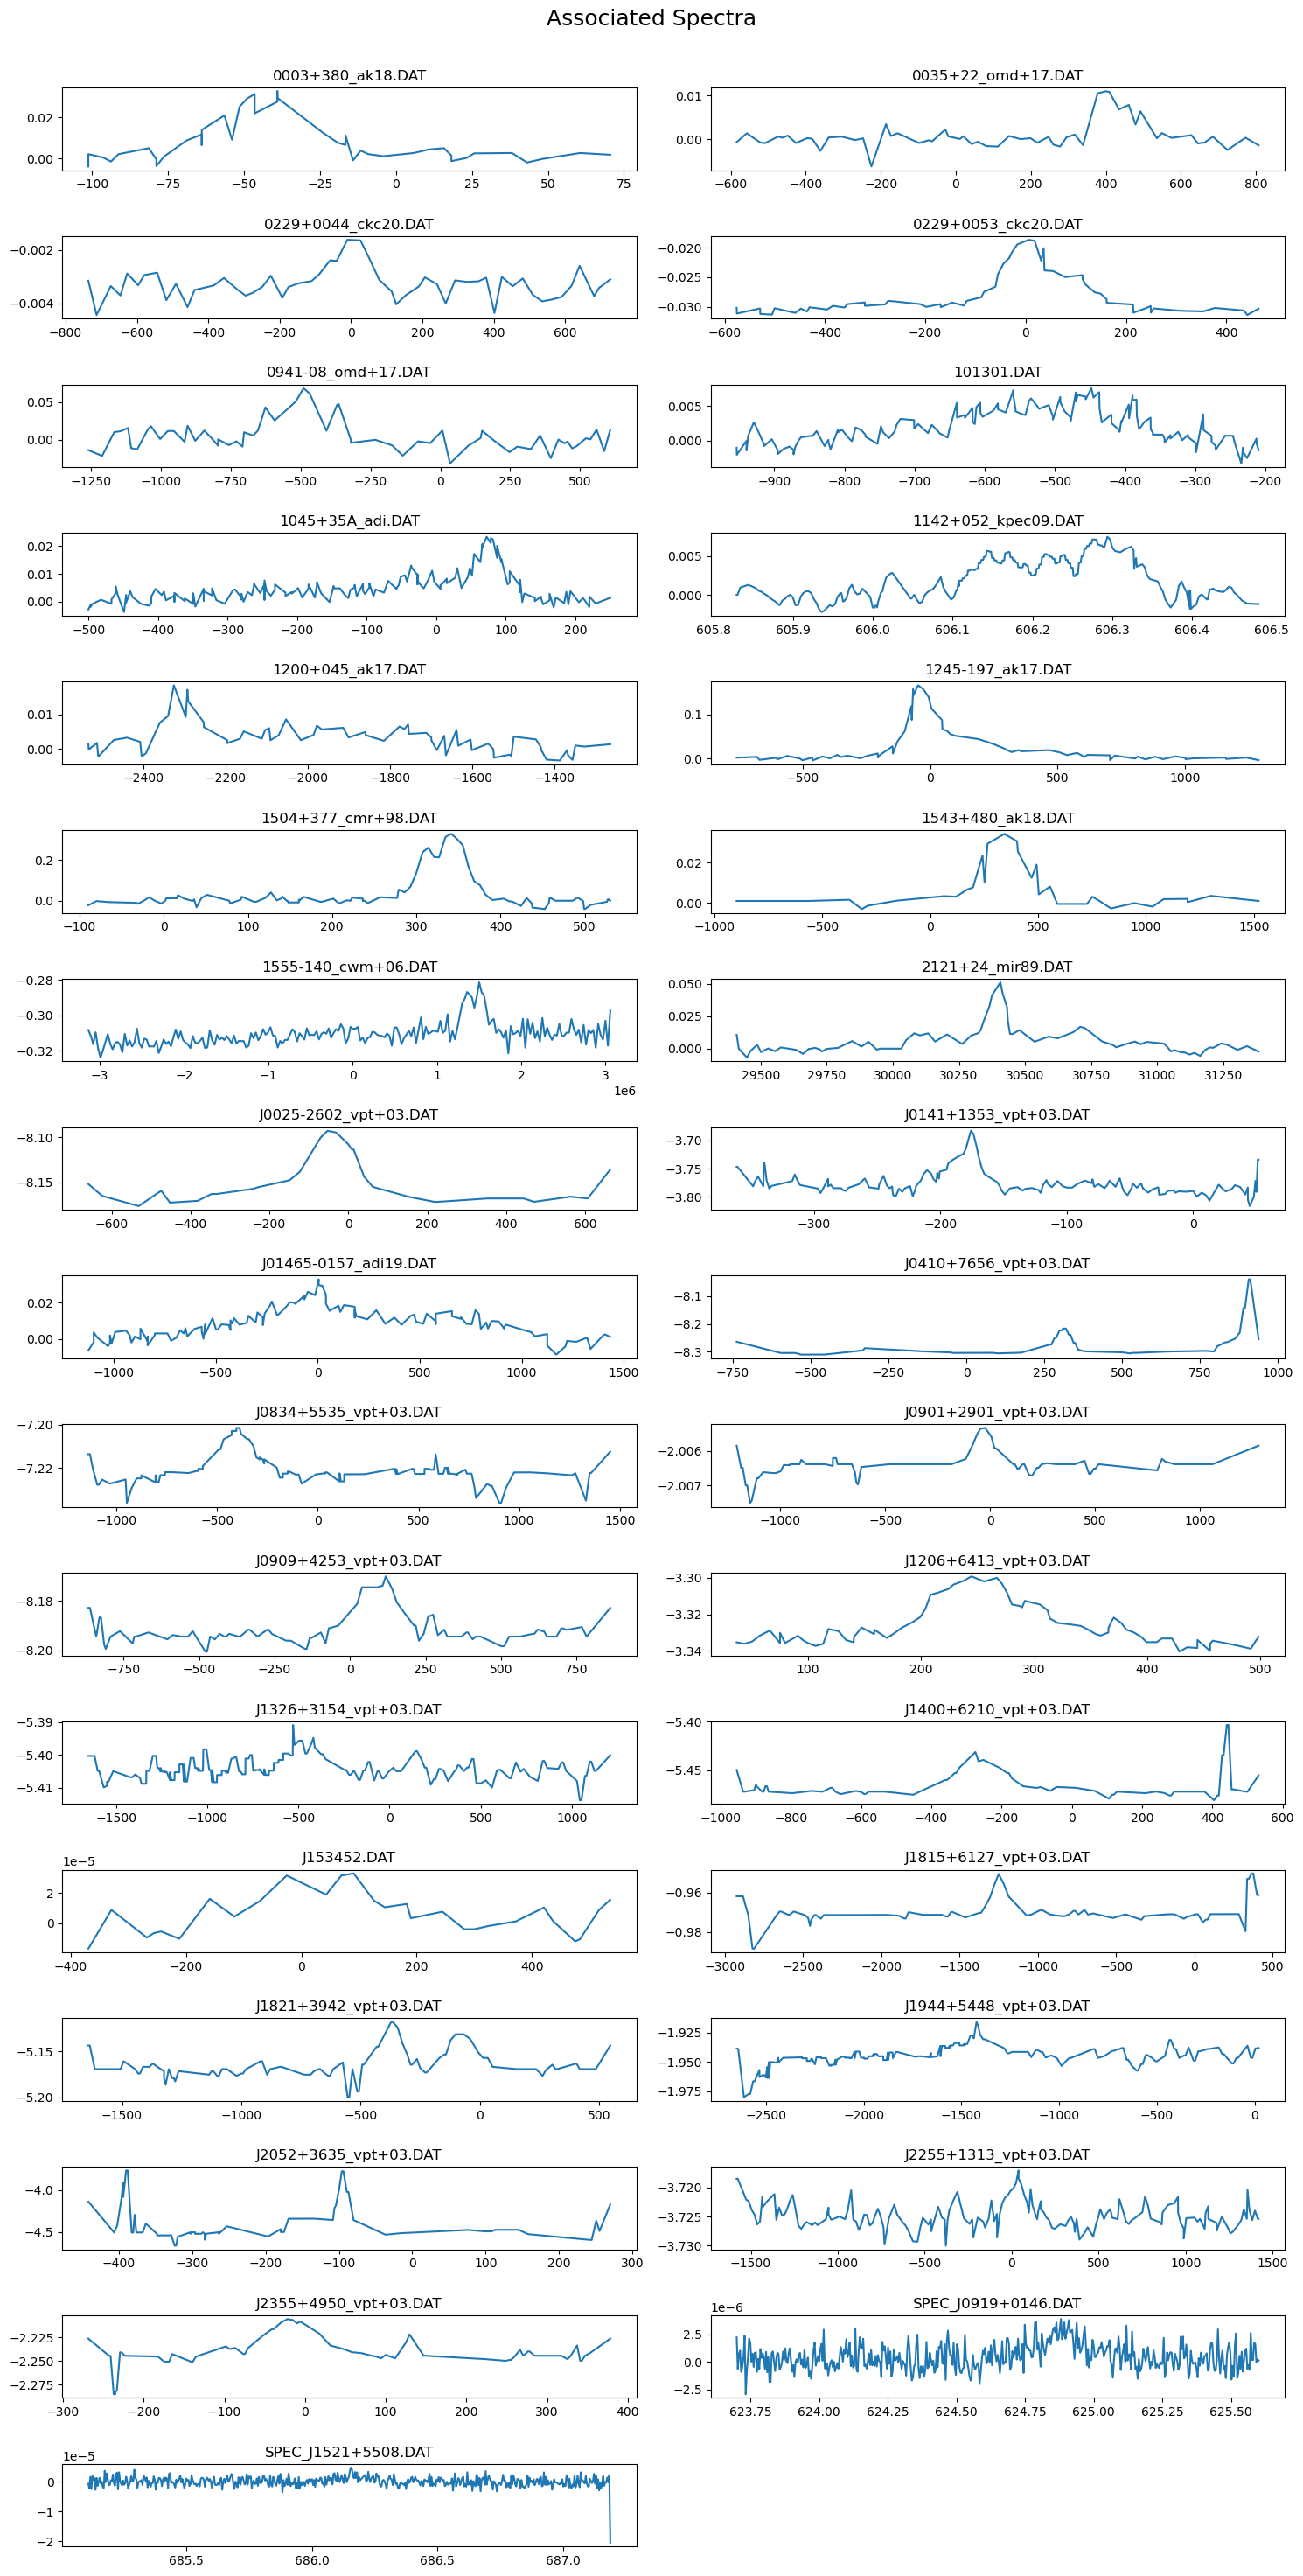

In [3]:
plt.figure(figsize=(15, 30))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Associated Spectra", fontsize=18)
for n, i in enumerate(ass):
    ax = plt.subplot(17, 2, n + 1)
    name = i.split('/')[-1]
    loaded = np.loadtxt(i)
    ax.plot(loaded[:,0], loaded[:,1])
    ax.set_title(name)
    fig = ax.get_figure()
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

In [2]:
maca = './data/Maccagni/Spectra_list - Maccagni.csv'
lis = './data/Maccagni/spectra_list_detections.txt'

In [3]:
# lis_load = np.loadtxt(lis, dtype='str')

with open (lis, "r") as myfile:
    lis_load = myfile.read().splitlines()

In [4]:
lis_load

['./J075756.71+395936.1/final/abs/spec/J075756.71+395936.1_spec.txt',
 './J080601.51+190614.7/final/abs/spec/J080601.51+190614.7_spec.txt',
 './J080938.88+345537.2/final/abs/spec/J080938.88+345537.2_spec.txt',
 './J082133.60+470237.3/final/abs/spec/J082133.60+470237.3_spec.txt',
 './J083548.14+151717.0/final/abs/spec/J083548.14+151717.0_spec.txt',
 './J083637.84+440109.6/final/abs/spec/J083637.84+440109.6_spec.txt',
 './J084307.11+453742.8/final/abs/spec/J084307.11+453742.8_spec.txt',
 './J090325.54+162256.0/final/abs/spec/J090325.54+162256.0_spec.txt',
 './J090734.91+325722.9/final/abs/spec/J090734.91+325722.9_spec.txt',
 './J090937.44+192808.2/final/abs/spec/J090937.44+192808.2_spec.txt',
 './J093551.59+612111.3/final/abs/spec/J093551.59+612111.3_spec.txt',
 './J102053.67+483124.3/final/abs/spec/J102053.67+483124.3_spec.txt',
 './J102400.53+511248.1/final/abs/spec/J102400.53+511248.1_spec.txt',
 './J102544.22+102230.4/final/abs/spec/J102544.22+102230.4_spec.txt',
 './J103932.12+46120

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(maca)

In [7]:
df

Name  Redshift
0   J075756.71+395936.1_spec.txt  0.065777
1   J080601.51+190614.7_spec.txt  0.097882
2   J080938.88+345537.2_spec.txt  0.082493
3   J082133.60+470237.3_spec.txt  0.128009
4   J083548.14+151717.0_spec.txt  0.168382
..                           ...       ...
61  J161740.53+350015.1_spec.txt  0.029815
62  J163804.02+264329.1_spec.txt  0.065206
63  J163844.80+275439.1_spec.txt  0.103508
64  J163956.07+112757.4_spec.txt  0.079178
65  J170815.25+211117.7_spec.txt  0.224124

[66 rows x 2 columns]

In [8]:
result=df.loc[df['Name'] == 'J075756.71+395936.1_spec.txt','Redshift'].values[0]
print(result)

0.065777


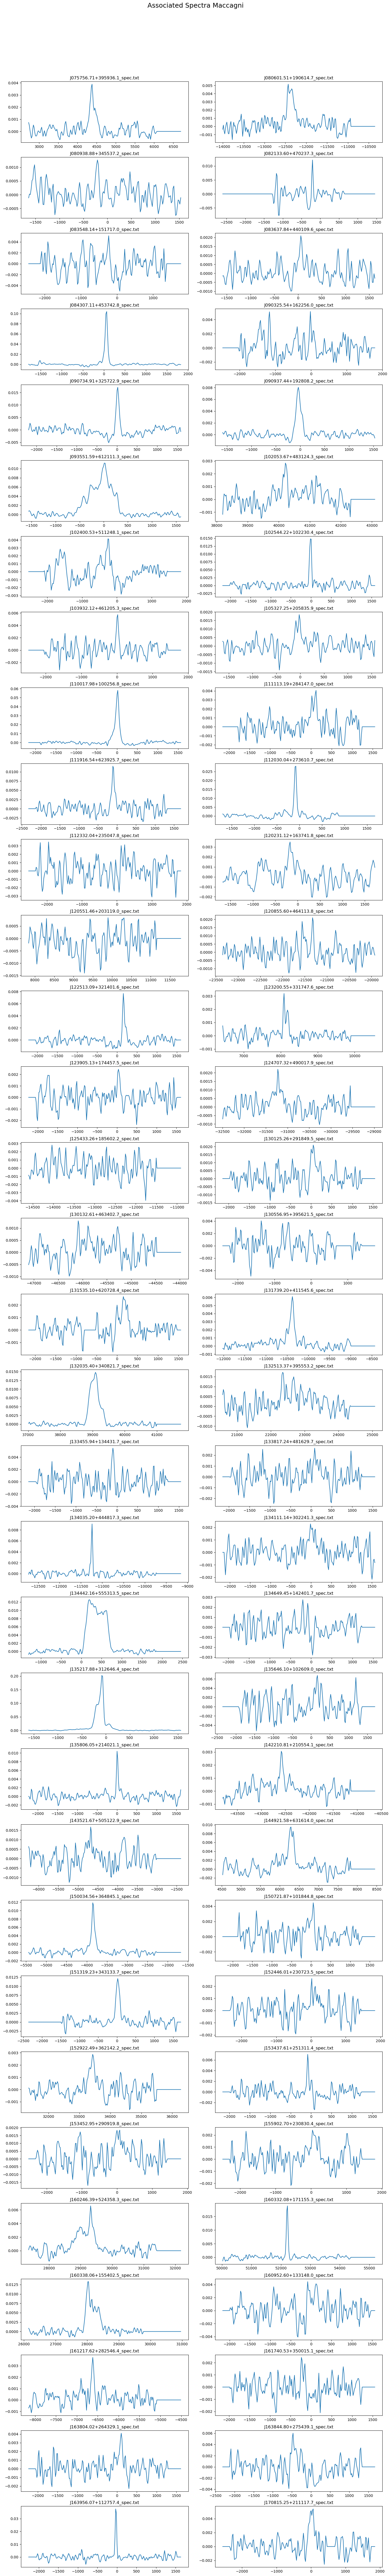

In [23]:
plt.figure(figsize=(15, 100))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Associated Spectra Maccagni", fontsize=18)
for n, i in enumerate(lis_load):
    result = []
    ax = plt.subplot(33, 2, n + 1)
    name = i.split('/')[-1]
    z0 = df.loc[df['Name'] == name, 'Redshift'].values[0]
    f0 = 1420405752/(1 + z0)
    sg = i.split('/')
    i_c = sg[0] + '/data/Maccagni/spectraArcHIve/' + sg[1] +'/'+sg[2]+'/'+sg[3]+'/'+sg[4]+'/'+sg[5]
    loaded = np.loadtxt(i_c)
    c = 299792.458
    velocity = [((f0 - x)*c)/x for x in loaded[:,0]]
    velocity = np.array(velocity)
    loaded[:,0] = velocity
    if i_c == './data/Maccagni/spectraArcHIve/J135217.88+312646.4/final/abs/spec/J135217.88+312646.4_spec.txt':
        loaded[:,1]*= -1
        ax.plot(velocity, loaded[:,1])
        # result.append([velocity,loaded[:,1]])
    else:
        loaded[:,2]*= -1
        ax.plot(velocity, loaded[:,2])
        # result.append([velocity,loaded[:,2]])
    # result = np.array(result)
    np.savetxt('./Associated_velocity_spectrum/'+sg[5], loaded)
    ax.set_title(name)
    # ax.set_xlim(-500, 500)
    fig = ax.get_figure()
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

plt.savefig('Maccagni Relative velocity for associated spectra')

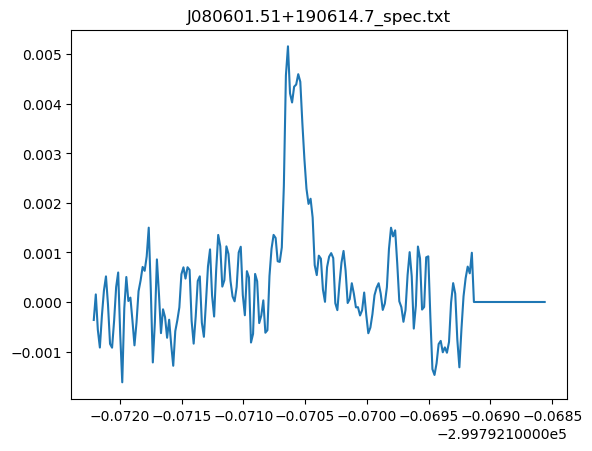

In [69]:
i = './data/Maccagni/spectraArcHIve/J080601.51+190614.7/final/abs/spec/J080601.51+190614.7_spec.txt'
name = i.split('/')[-1]
z0 = 0.097882
f0 = 1420.405752/(1 + z0)
loaded = np.loadtxt(i)
c = 299792.458
velocity = [((f0 - x)*c)/x for x in loaded[:,0]]
velocity = np.array(velocity)
loaded[:,0] = velocity
loaded[:,2]*= -1
# np.savetxt('./Associated_velocity_spectrum/'+name, loaded)
plt.plot(loaded[:,0], loaded[:,2])
plt.title(name)
plt.show()

# Intervening

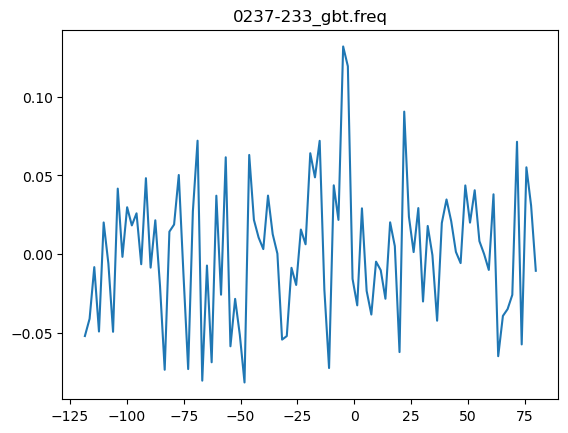

In [60]:
i = './data/Kanekar/Spectra_flux_vs_frequency/0237-233_gbt.freq'
name = i.split('/')[-1]
z0 = 1.6724
f0 = 1420.405752/(1 + z0)
loaded = np.loadtxt(i)
c = 299792.458
velocity = [((f0 - x)*c)/x for x in loaded[:,0]]
velocity = np.array(velocity)
loaded[:,0] = velocity
loaded[:,1]*= -1
np.savetxt('./Intervening_velocity_spectrum/'+name, loaded)

plt.plot(loaded[:,0], loaded[:,1])
plt.title(name)
plt.show()

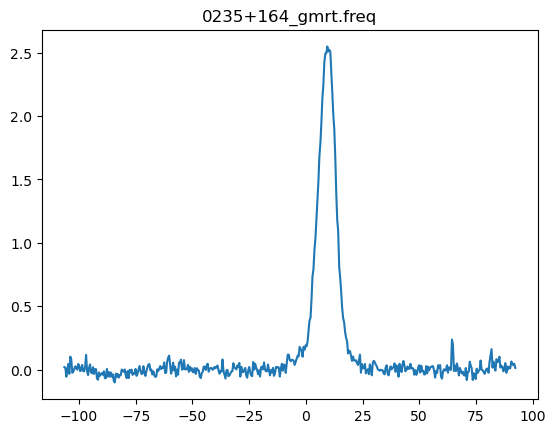

In [54]:
i = './Intervening_velocity_spectrum/0235+164_gmrt.freq'
name = i.split('/')[-1]
loaded[:,1]*= 10**(3)
np.savetxt('./Intervening_velocity_spectrum/'+name, loaded)

plt.plot(loaded[:,0], loaded[:,1])
plt.title(name)
plt.show()

In [61]:
from glob import glob

lis = np.sort(glob('./data/Kanekar/Spectra_flux_vs_velocity/*'))

for i in lis:
    loaded = np.loadtxt(i)
    name = i.split('/')[-1]
    if i == './data/Kanekar/Spectra_flux_vs_velocity/0438-436_gbt.freq':
        loaded[:,1]*= -10**(-3)
    else:
        loaded[:,1]*= -1
    
    np.savetxt('./Intervening_velocity_spectrum/'+name, loaded)

In [64]:
print(len(np.sort(glob('./Intervening_velocity_spectrum/SPEC_*'))))

14


In [65]:
from glob import glob

lis = np.sort(glob('./Intervening_velocity_spectrum/SPEC_*'))

for i in lis:
    loaded = np.loadtxt(i)
    name = i.split('/')[-1]
    loaded[:,1]*= 10**(-3)
    
    np.savetxt('./Intervening_velocity_spectrum/'+name, loaded)

# Converting Normalised Flux vs Frequency/Velocity into Flux density vs Frequency/Velocity spectra

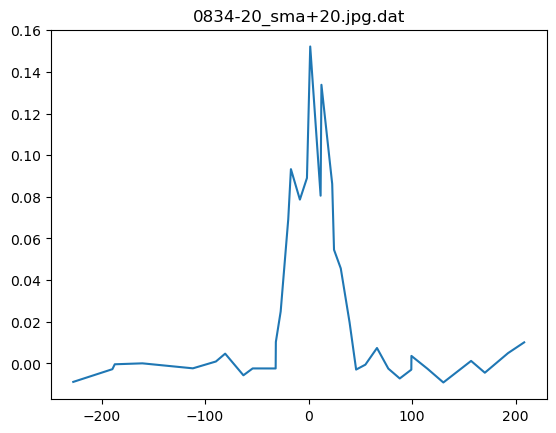

In [5]:
i = './data/Curran/profiles1/spectra_reversed/0834-20_sma+20.jpg.dat'
name = i.split('/')[-1]
loaded = np.loadtxt(i)
# loaded[:,1]*=
np.savetxt('./Intervening_velocity_spectrum/'+name, loaded)

plt.plot(loaded[:,0], loaded[:,1])
plt.title(name)
plt.show()

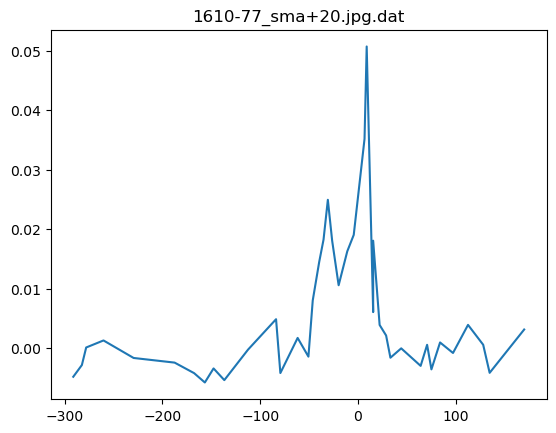

In [6]:
i = './data/Curran/profiles1/spectra_reversed/1610-77_sma+20.jpg.dat'
name = i.split('/')[-1]
loaded = np.loadtxt(i)
# loaded[:,1]*=
np.savetxt('./Intervening_velocity_spectrum/'+name, loaded)

plt.plot(loaded[:,0], loaded[:,1])
plt.title(name)
plt.show()

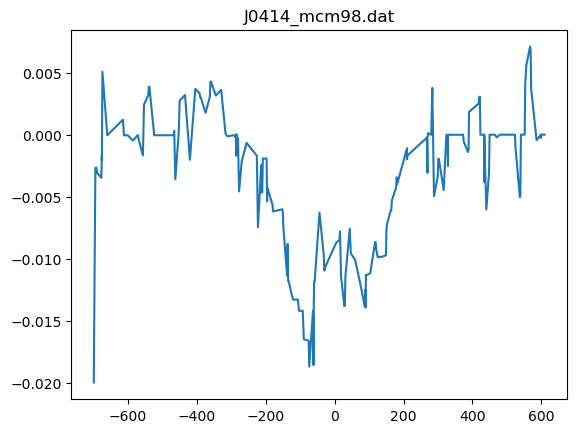

In [7]:
i = './data/Curran/profiles2/spectra_reversed/J0414_mcm98.dat'
name = i.split('/')[-1]
loaded = np.loadtxt(i)
# loaded[:,1]*=
np.savetxt('./Intervening_velocity_spectrum/'+name, loaded)

plt.plot(loaded[:,0], loaded[:,1])
plt.title(name)
plt.show()

In [8]:
from glob import glob

print(len(np.sort(glob('./Associated_velocity_spectrum/*'))))

78


In [9]:
print(len(np.sort(glob('./Intervening_velocity_spectrum/*'))))

49
